Persiapan

In [2]:
# Mengimport library untuk membaca data
import pandas as pd

# Mengimport library untuk mengolah data
import numpy as np

Load Data

In [3]:
# Membaca data tweet_emotions.csv
data = pd.read_csv('tweet_emotions.csv')

# Mengambil 5 baris awal dari file tweet_emotions.csv
data.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


Visualisasi Data

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'empty'),
  Text(1, 0, 'sadness'),
  Text(2, 0, 'enthusiasm'),
  Text(3, 0, 'neutral'),
  Text(4, 0, 'worry'),
  Text(5, 0, 'surprise'),
  Text(6, 0, 'love'),
  Text(7, 0, 'fun'),
  Text(8, 0, 'hate'),
  Text(9, 0, 'happiness'),
  Text(10, 0, 'boredom'),
  Text(11, 0, 'relief'),
  Text(12, 0, 'anger')])

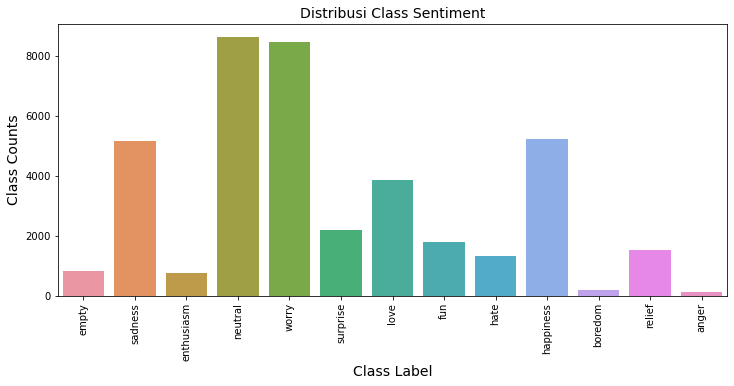

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.countplot(x='sentiment', data=data)
plt.title('Distribusi Class Sentiment', fontsize=14)
plt.ylabel('Class Counts', fontsize=14)
plt.xlabel('Class Label', fontsize=14)
plt.xticks(rotation='vertical')

<h1>PRA PENGOLAHAN DATA</h1>


Drop Kolom

In [5]:
data.drop(columns="tweet_id", inplace = True)

In [6]:
%matplotlib inline
data.columns

Index(['sentiment', 'content'], dtype='object')

In [7]:
data.head()

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


Inspeksi Data

In [8]:
# Mengecek jumlah data per kelas
print(data['sentiment'].value_counts())
print('\n')

# Mengecek kelengkapan data
print(data.info())
print('\n')

# Mengecek statistik deskriptif
print(data.describe())

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  40000 non-null  object
 1   content    40000 non-null  object
dtypes: object(2)
memory usage: 625.1+ KB
None


       sentiment                                            content
count      40000                                              40000
unique        13                                              39827
top      neutral  I just received a mothers day card from my lov...
freq        8638                                                 14


In [9]:
# Mengimport regex library
import re, string, unicodedata 

# Mengimport word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

def remove_tweet_special(text):
    # Menghapus tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # Menghapus non ASCII (emoticon, chineese word, dan lainnya)
    text = text.encode('ascii', 'replace').decode('ascii')
    # Menghapus mention, link, dan hastag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # Menghapus URL yang tidak lengkap
    return text.replace("http://"," ").replace("http://", " ")

data['content'] = data['content'].apply(remove_tweet_special)

# Menghapus angka
def remove_number(text):
    return re.sub(r"\d+", "", text)

data['content'] = data['content'].apply(remove_number)

# Menghapus tanda baca
def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

data['content'] = data['content'].apply(remove_punctuation)

# Menghapus spasi di awal dan di akhir
def remove_whitespace_LT(text):
    return text.strip()

data['content'] = data['content'].apply(remove_whitespace_LT)

# Menghapus spasi ganda menjadi spasi tunggal
def remove_whitespace_multiple(text):
    return re.sub('\s+', ' ', text)

data['content'] = data['content'].apply(remove_whitespace_multiple)

# Menghapus single char
def remove_single_char(text):
    return re.sub(r"\b[a=zA-Z]\b", "", text)

data['content'] = data['content'].apply(remove_single_char)

# NLTK word tokenize
def word_tokenize_wrapper(text):
    return word_tokenize(text)

print('Hasil Tokenizing : \n')
print(data['content'].head())
print('\n\n\n')

Hasil Tokenizing : 

0    i know i was listenin to bad habit earlier and...
1    Layin n bed with  headache ughhhhwaitin on you...
2                        Funeral ceremonygloomy friday
3                  wants to hang out with friends SOON
4    We want to trade with someone who has Houston ...
Name: content, dtype: object






In [10]:
data['content'] = data['content'].replace('@', '', regex = True)
data.head()

,sentiment,content
0,empty,i know i was listenin to bad habit earlier and...
1,sadness,Layin n bed with headache ughhhhwaitin on you...
2,sadness,Funeral ceremonygloomy friday
3,enthusiasm,wants to hang out with friends SOON
4,neutral,We want to trade with someone who has Houston ...


Memisahkan Fitur dengan Label


In [11]:
X = data['content'].values
y = data['sentiment'].values

<h1>EKSTRAKSI FITUR</h1>

Ekstraksi fitur untuk setiap content akan menggunakan konsep Bag of Words. Kita dapat menggunakan fungsi CountVectorizer dari scikit-learn. Akan tetapi untuk mencegah leaking information kita akan melakukan split data terlebuh dahulu, baru melakukan transformasi terhadap data training dan testing

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Membagi data ke training dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

bow = CountVectorizer(stop_words='english')

X_train = bow.fit_transform(X_train)

X_test = bow.transform(X_test)

<h1>PEMBUATAN MODEL</h1>

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

<h1>EVALUASI MODEL</h1>

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisialisasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data train: {acc_test}')

Hasil akurasi data train: 0.56396875
Hasil akurasi data train: 0.322125
